In [1]:
#Import Dependencies
import pandas as pd
import os
import csv
import requests
import matplotlib.pyplot as plt
from config import api_key 
import json
import pprint
import kdtree
import random
import scipy.stats as sts
from sklearn import datasets

In [2]:
#Create connection for Open Weather Map 
#Identify location and URL logic for open weather map
url="http://api.openweathermap.org/data/2.5/weather?q="

#Create Request URLs and Variables
#city_name=""
key="&appid="+ api_key

#Obtain cities from PIP install 
_current_dir, _current_filename = os.path.split("C:\\Users\\porti\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>")
_world_cities_csv_path = os.path.join(_current_dir, 'worldcities.csv')
_world_cities_kdtree = kdtree.create(dimensions=2)
WORLD_CITIES_DICT = {}


In [3]:
print(url)

http://api.openweathermap.org/data/2.5/weather?q=


In [4]:
#Access Random City Data
with open(_world_cities_csv_path, 'r') as csv_file:
    cities = csv.reader(csv_file)
    # discard the headers
    cities.__next__()
    city_list=[]
    random_cities=[]
    for city in cities:
        city_coordinate_key = (float(city[2]), float(city[3]))
        _world_cities_kdtree.add(city_coordinate_key)
        city_list.append(city[1])
random_cities.append(random.choices(city_list,k=51))
random_cities

[['soron',
  'branistea',
  'uren',
  'komsomolsk-na-amure',
  'linda',
  'bad schwartau',
  'basesti',
  'straubing',
  'gargunnock',
  'maputo',
  'manlleu',
  'kirksville',
  'tsagan aman',
  'north auburn',
  'plantation',
  'greenfield',
  'arani',
  'vityazevo',
  'binahaan',
  'san mariano',
  'tabriz',
  'ladozhskaya',
  'mahemdavad',
  'filipesti',
  'chynadiyovo',
  'ayutuxtepeque',
  'kos',
  'floreffe',
  'tar',
  'krutaya gorka',
  'sarretudvari',
  'strathpeffer',
  'shellbrook',
  'lantapan',
  'ostroveni',
  'tanacu',
  'shikhazany',
  'linan',
  'verin getashen',
  'mission',
  'tet',
  'novoblagodarnoye',
  'anapskaya',
  'khariessa',
  'cheuskiny',
  'yuzhnyy',
  'stockport',
  'calzada larga',
  'zherdevka',
  'rincon',
  'oinoussai']]

In [94]:
#Build Open Weather Request URLs
response_list=[]
latitude_list=[]
temperature_list=[]
humidity_list=[]
cloudiness_list=[]
windspeed_list=[]
temp_north_hem=[]
temp_south_hem=[]
hum_north_hem=[]
hum_south_hem=[]
cloud_north_hem=[]
cloud_south_hem=[]
wind_north_hem=[]
wind_south_hem=[]
city_insight=[]
place=[]
place_location=[]
for city in random_cities:
    for cur_random_cities in random_cities:
        for city in cur_random_cities:
            city_data = requests.get(url+city+key).json()
            response_list.append(city_data)
            try:
                name=city_data["name"]
                lon=city_data["coord"]["lon"]
                lat=city_data["coord"]["lat"]
                humidity=city_data["main"]["humidity"]
                max_temp=(city_data["main"]["temp_max"]-273.15)*1.8+32
                windspeed=city_data["wind"]["speed"]
                cloudiness=city_data["clouds"]["all"]
                places=[name,lat,lon,humidity,max_temp,windspeed,cloudiness]
                coord=(lat,lon)
                place.append(places)
                place_location.append(coord)               
            except:
                pass

%store place


Stored 'place' (list)


In [95]:
try:
    for place in response_list: 
            print(place)
            latitude_list.append(place['coord']['lat'])
            temperature_list.append((place['main']['temp']-273.15)*1.8+32)
            cloudiness_list.append(place['clouds']['all'])
            windspeed_list.append(place['wind']['speed'])
            humidity_list.append(place['main']['humidity'])
except:
    pass

{'coord': {'lon': 78.75, 'lat': 27.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.83, 'feels_like': 302.86, 'temp_min': 299.83, 'temp_max': 299.83, 'pressure': 1002, 'humidity': 84, 'sea_level': 1002, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 3.77, 'deg': 145}, 'clouds': {'all': 83}, 'dt': 1598818867, 'sys': {'country': 'IN', 'sunrise': 1598833406, 'sunset': 1598879255}, 'timezone': 19800, 'id': 1255704, 'name': 'Soron', 'cod': 200}
{'coord': {'lon': 25.58, 'lat': 44.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.48, 'feels_like': 298.42, 'temp_min': 296.15, 'temp_max': 298.15, 'pressure': 1014, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1598818867, 'sys': {'type': 1, 'id': 6919, 'country': 'RO', 'sunrise': 1598758691, 'sunset': 1598806724}

In [96]:
%store place_location

Stored 'place_location' (list)


In [97]:
response_list_df=pd.DataFrame(response_list)
response_list_df.to_csv("random_city_list.csv")


In [98]:
latitude_list

[27.88,
 44.68,
 57.46,
 50.55,
 39.13,
 53.92,
 47.48,
 48.88,
 56.12,
 -25.97,
 42,
 40.19,
 47.56,
 38.93,
 26.13,
 42.96,
 12.67,
 44.99,
 13.99,
 7.5,
 38.08,
 45.31,
 22.83,
 46.75,
 48.48,
 13.75,
 36.89,
 50.43,
 47.95,
 55.36,
 47.23,
 57.59,
 53.22,
 8,
 43.8,
 46.68,
 55.56,
 6.43,
 40.13,
 26.22,
 47.52,
 44.14,
 44.89]

In [99]:
temperature_list

[80.02400000000002,
 75.79400000000007,
 59.63000000000004,
 48.038000000000046,
 86.0,
 58.694000000000074,
 70.84400000000008,
 57.272000000000034,
 54.71600000000001,
 61.82600000000009,
 57.254000000000055,
 80.31200000000007,
 77.0,
 87.674,
 91.97600000000008,
 70.66400000000004,
 80.09600000000006,
 77.0,
 80.00600000000003,
 78.80000000000001,
 73.4,
 80.36600000000001,
 78.80000000000001,
 70.37600000000009,
 64.00400000000005,
 84.63200000000002,
 77.0,
 56.858000000000004,
 80.11400000000003,
 66.2,
 80.72600000000008,
 53.22200000000004,
 55.400000000000006,
 68.07200000000003,
 73.45400000000006,
 80.79800000000003,
 62.6,
 72.68000000000004,
 59.19800000000002,
 98.42000000000006,
 75.12800000000007,
 68.0,
 77.0]

Text(22.0, 0.5, 'Lat')

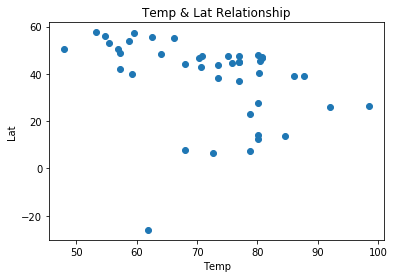

In [100]:
plt.scatter(temperature_list,latitude_list)
slope, intercept, r_value, p_value, std_err = sts.linregress(temperature_list,latitude_list)
plt.title("Temp & Lat Relationship")
plt.savefig("temp_lat_relationship.png")
plt.xlabel("Temp")
plt.ylabel("Lat")
#The plot below represents the relationship between temperature and latitude.

In [101]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(temperature_list,latitude_list)
#Linear Regression Valuues
for temp in response_list:
    regress_values = int(temp['coord']['lat']) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere Temps
    if (temp["coord"]["lat"])>=0:
        temp_north_hem.append((temp["main"]["temp"]-273.15)*1.8+32)
    else:
        temp_south_hem.append((temp["main"]["temp"]-273.15)*1.8+32)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

62.08226201251833
53.04722357367072
46.138076532199015
49.85838647760686
55.7045878203906
48.26396792957492
51.45280502563878
50.92133217629481
46.66954938154299
89.71885017840513
54.110169272358675
55.17311497104662
51.45280502563878
56.23606066973458
62.613734861862305
54.110169272358675
70.05435475267798
53.04722357367072
69.52288190333401
72.71171899939787
56.23606066973458
52.515750724326736
64.73962625923821
51.984277874982766
50.92133217629481
69.52288190333401
57.29900636842253
49.85838647760686
51.45280502563878
47.20102223088696
51.45280502563878
46.138076532199015
48.26396792957492
72.18024615005389
53.57869642301469
51.984277874982766
47.20102223088696
73.24319184874184
55.17311497104662
62.613734861862305
51.45280502563878
53.04722357367072
53.04722357367072


KeyError: 'coord'

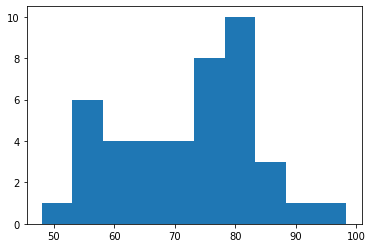

In [102]:
#histogram of temps in the northern hemisphere showing that the majority of temps recorded are between 75 and 85 degrees
plt.hist(temp_north_hem)
plt.savefig("temp_north_hem.png")

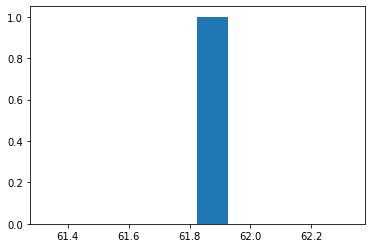

In [103]:
plt.hist(temp_south_hem)
plt.savefig("temp_south_hem.png")
#There is an uneven distribution between the random points returned as points of refrence. The majority of reponses
#returned would be considered the northern hemisphere. 

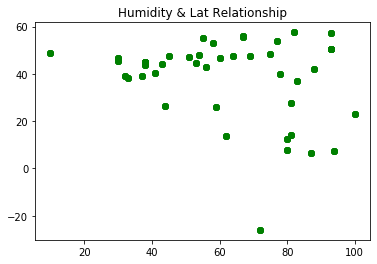

In [74]:
plt.scatter(humidity_list,latitude_list, color="green")
sts.linregress(humidity_list,latitude_list)
plt.title("Humidity & Lat Relationship")
plt.savefig("humidity_lat.png")
#The plot below represents the relationship between humidity and latitude.

In [75]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(humidity_list,latitude_list)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["main"]["humidity"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere humidity
    if (temp["coord"]["lat"])>=0:
        hum_north_hem.append(temp["main"]["humidity"])
    else:
        hum_south_hem.append(temp["main"]["humidity"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

45.589188005383136
42.03106454052547
39.31014659681078
40.775256258811
43.07757144195419
40.147352117953766
41.40316039966824
41.19385901938249
39.51944797709653
56.472859780241876
42.44966730109696
42.86827006166845
41.40316039966824
43.28687282223994
45.79848938566888
42.44966730109696
48.72870870966931
42.03106454052547
48.51940732938357
49.775215611098034
43.28687282223994
41.821763160239726
46.63569490681186
41.612461779953975
41.19385901938249
48.51940732938357
43.70547558281143
40.775256258811
41.40316039966824
39.72874935738227
41.40316039966824
39.31014659681078
40.147352117953766
49.56591423081229
42.240365920811215
41.612461779953975
39.72874935738227
49.98451699138378
42.86827006166845
45.79848938566888
41.40316039966824
42.03106454052547
42.03106454052547


KeyError: 'coord'

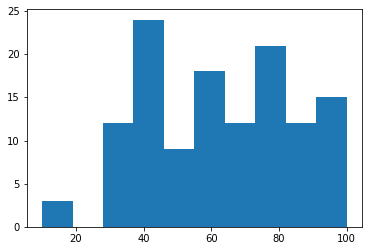

In [76]:
plt.hist(hum_north_hem)
plt.savefig("hum_north_hem.png")

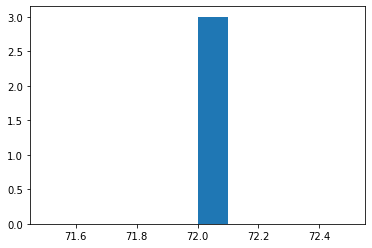

In [77]:
plt.hist(hum_south_hem)
plt.savefig("hum_south_hem.png")

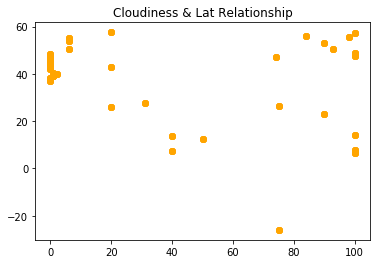

In [78]:
plt.scatter(cloudiness_list,latitude_list, color="orange")
sts.linregress(cloudiness_list,latitude_list)
plt.title("Cloudiness & Lat Relationship")
plt.savefig("cloud_lat.png")
#The plot below represents the relationship between cloudiness and latitude.

In [79]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude_list,humidity_list)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["clouds"]["all"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere cloudiness
    if (temp["coord"]["lat"])>=0:
        cloud_north_hem.append(temp["clouds"]["all"])
    else:
        cloud_south_hem.append(temp["clouds"]["all"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

65.8033030874562
60.22649711809933
55.96188078859113
58.258212658326315
61.866734167910174
57.274070428439806
59.24235488821282
58.91430747825065
56.2899281985533
82.86176840548899
60.882591938023666
61.53868675794801
59.24235488821282
62.19478157787234
66.13135049741837
60.882591938023666
70.72401423688873
60.22649711809933
70.39596682692657
72.36425128669958
62.19478157787234
59.89844970813716
67.44354013726705
59.57040229817499
58.91430747825065
70.39596682692657
62.85087639779668
58.258212658326315
59.24235488821282
56.617975608515465
59.24235488821282
55.96188078859113
57.274070428439806
72.03620387673742
60.5545445280615
59.57040229817499
56.617975608515465
72.69229869666175
61.53868675794801
66.13135049741837
59.24235488821282
60.22649711809933
60.22649711809933


KeyError: 'coord'

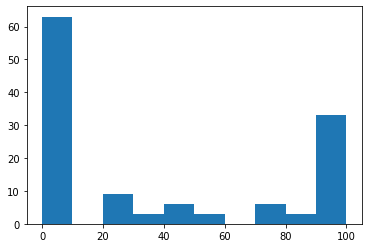

In [80]:
plt.hist(cloud_north_hem)
plt.savefig("cloud_north_hem.png")

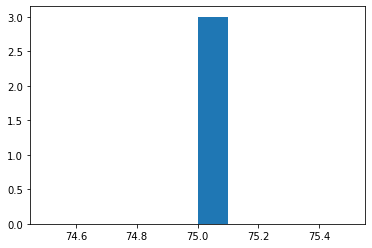

In [81]:
plt.hist(cloud_south_hem)
plt.savefig("cloud_south_hem.png")

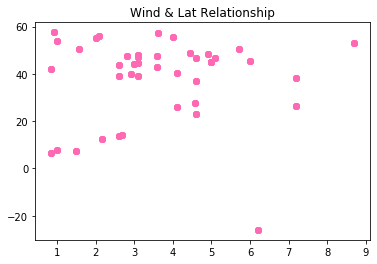

In [82]:
plt.scatter(windspeed_list,latitude_list, color="hotpink")
sts.linregress(windspeed_list,latitude_list)
plt.title("Wind & Lat Relationship")
plt.savefig("wind_lat.png")
#The plot below represents the relationship beteween windspeed and latitude.

In [83]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude_list,humidity_list)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["wind"]["speed"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere Wind Speed
    if (temp["coord"]["lat"])>=0:
        wind_north_hem.append(temp["clouds"]["all"])
    else:
        wind_south_hem.append(temp["clouds"]["all"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

65.8033030874562
60.22649711809933
55.96188078859113
58.258212658326315
61.866734167910174
57.274070428439806
59.24235488821282
58.91430747825065
56.2899281985533
82.86176840548899
60.882591938023666
61.53868675794801
59.24235488821282
62.19478157787234
66.13135049741837
60.882591938023666
70.72401423688873
60.22649711809933
70.39596682692657
72.36425128669958
62.19478157787234
59.89844970813716
67.44354013726705
59.57040229817499
58.91430747825065
70.39596682692657
62.85087639779668
58.258212658326315
59.24235488821282
56.617975608515465
59.24235488821282
55.96188078859113
57.274070428439806
72.03620387673742
60.5545445280615
59.57040229817499
56.617975608515465
72.69229869666175
61.53868675794801
66.13135049741837
59.24235488821282
60.22649711809933
60.22649711809933


KeyError: 'coord'

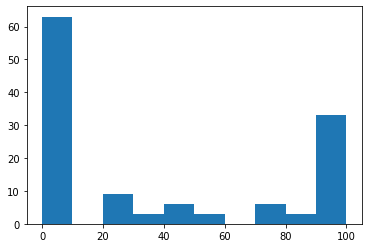

In [84]:
plt.hist(wind_north_hem)
plt.savefig("wind_north_hem.png")

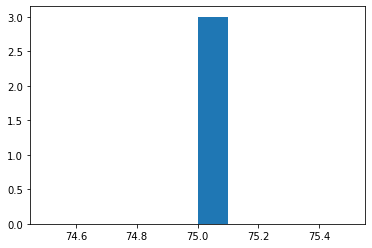

In [85]:
plt.hist(wind_south_hem)
plt.savefig("wind_south_hem.png")